In [29]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#pd.set_option('display.max_rows', 30)

In [30]:
df = pd.read_csv('./final_Nov_09.csv')
df.shape


(2283, 11)

In [31]:
# select numerical columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
# select non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

# Missing values

In [32]:
# % of values missing in each column
values_list = list()
cols_list = list()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)
pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = values_list

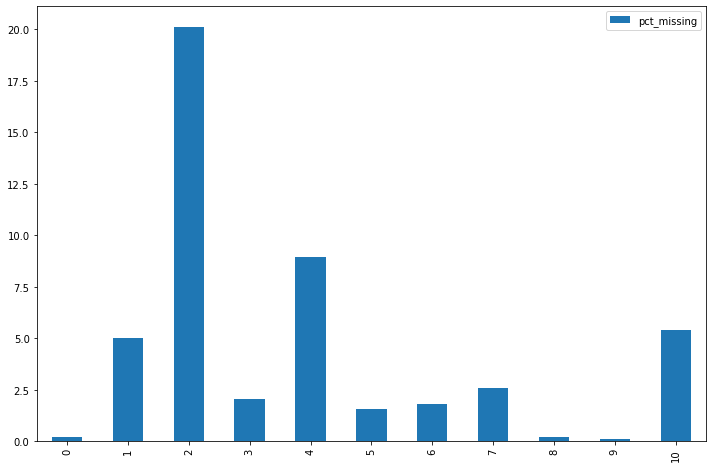

In [33]:
pct_missing_df.loc[pct_missing_df.pct_missing > 0].plot(kind='bar', figsize=(12,8))
plt.show()

In [34]:
#we will replace missing values with the mode values of that column.
df_non_numeric = df.select_dtypes(exclude=[np.number]) 
non_numeric_cols = df_non_numeric.columns.values
for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        mod = df[col].describe()['top'] # impute with the most frequently occuring value
        df[col] = df[col].fillna(mod)

In [35]:
df.isnull().sum().sum()

0

In [36]:
df.Current_Company.describe()

count                                                  2283
unique                                                 1340
top       National University of Computer and Emerging S...
freq                                                    182
Name: Current_Company, dtype: object

# Duplicate records

In [37]:
# dropping duplicates by considering all columns other than ProfileIDS
cols_other_than_ProfileIDS = list(df.columns)[-1:]
df.drop_duplicates(subset=cols_other_than_ProfileIDS, inplace=True)

In [38]:
df.shape

(2133, 11)

# Fixing data type

In [39]:
#df.timestamp.dtype
# converting timestamp to datetime format
#df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d')

In [40]:
df

,Name,Current_Company,Current_Job,Total_year,job_location,Last_degree,Graduation_start_year,Graduation_end_year,Last_University,ProfileIDS,skills
0,Abrar Javed,Upwork,Professional Freelancer,Sep 2020 – Present,Pakistan,BS electrical engineering,2015,2020,National University of Computer and Emerging S...,/in/abrar-javed-49854b14b/,Management||Microsoft Excel||Customer Service|...
1,Mahrukh Fatima,DevBunch Private Limited,Project Coordinator,Oct 2021 – Present,"Lahore, Pakistan",Bachelor of Business Administration (BBA),2014,2018,National University of Computer and Emerging S...,/in/mahrukh-fatima-60b863106/,Microsoft Office||Customer Service||Microsoft ...
2,Neha Nadeem,Daraz,Data Analyst,Dec 2020 – Present,"Los Angeles, California, United States",BS(CS),2016,2020,National University of Computer and Emerging S...,/in/nehanadeem/,Business Intelligence (BI)||Data Analysis||Dat...
3,Abdul Rafeh,No Joke Marketing,Corporate Marketing Manager,Oct 2021 – Present,United States,Master's degree,2017,2018,National University of Computer and Emerging S...,/in/rafeh11/,Microsoft Office||Microsoft Excel||PowerPoint|...
4,Areeba Ayyaz,KeepTruckin,Software Engineer- Backend,Nov 2020 – Present,"Lahore, Punjab, Pakistan",Bachelor of Science in Computer Science,2016,2020,National University of Computer and Emerging S...,/in/areeba-ayyaz-6948071a3/,Java||Ruby on Rails||Problem Solving||Android ...
...,...,...,...,...,...,...,...,...,...,...,...
2277,Muhammad Siddique,CCL Pharmaceuticals,Assistant Manager Contract Manufacturing,Sep 2020 – Present,"Lahore, Pakistan",Certified Supply Chain Professional,2020,2020,PIQC Institute of Quality Pakistan,/in/muhammad-siddique-58480117/,Market Research||Marketing Management||Team Ma...
2278,Agha Hamza Waheed,CarFirst,Area Manager Purchase,Mar 2019 – Present,"Lahore, Pakistan",Bachelor's degree,2012,2017,National University of Computer and Emerging S...,/in/agha-hamza-waheed-bb2384b1/,Microsoft Office||Team Management||Auditing||F...
2279,Mian Muhammad Faizan Elahi,Tkxel,Sales Development Representative,Aug 2020 – Dec 2020,"Lahore, Punjab, Pakistan",Master of Business Administration - MBA,2020,2022,Lahore School of Economics,/in/mian-muhammad-faizan-elahi/,Business Analytics||Digital Marketing||Search ...
2281,Hajra Arshad,Online,Freelance Writer,Aug 2018 – Present,"Islamabad, Islamabad, Pakistan",Master of Business Administration - MBA,2020,2022,Institute of Business Administration,/in/hajra-arshad/,Adobe Photoshop||Microsoft Excel||Microsoft Wo...


In [41]:
#df.to_csv('./ML_preprocess_data.csv')
df.nunique()

Name                     2046
Current_Company          1278
Current_Job               845
Total_year                416
job_location              219
Last_degree               364
Graduation_start_year      32
Graduation_end_year        31
Last_University           196
ProfileIDS               2133
skills                   2133
dtype: int64

In [273]:
#print("Data Shape:",Alumni_Data.shape)
#df.describe()
#df.nunique()
#df['Current_Company'].unique()
#Alumni_Data['Current_Job'].unique()
#Alumni_Data['job_location'].unique()
#Alumni_Data['Last_degree'].unique()
#Alumni_Data['Last_University'].unique()

In [42]:
df['Name'] = df['Name'].str.lower()
df['Current_Company'] = df['Current_Company'].str.lower()
df['Current_Job'] = df['Current_Job'].str.lower()
df['job_location'] = df['job_location'].str.lower()
df['Last_degree'] = df['Last_degree'].str.lower()
df['Last_University'] = df['Last_University'].str.lower()
df['Total_year'] = df['Total_year'].str.lower()
df['Graduation_start_year'] = df['Graduation_start_year'].str.lower()
df['Graduation_end_year'] = df['Graduation_end_year'].str.lower()
df['skills'] = df['skills'].str.lower()


In [43]:
x=df["Current_Job"]
len(x)
x

0                        professional freelancer
1                            project coordinator
2                                   data analyst
3                    corporate marketing manager
4                     software engineer- backend
                          ...                   
2277    assistant manager contract manufacturing
2278                       area manager purchase
2279            sales development representative
2281                            freelance writer
2282                           marketing manager
Name: Current_Job, Length: 2133, dtype: object

In [349]:
def degN():
#     if x.find('computer') != -1 or x.lower().find('science') != -1 or x.find('BS(CS)') != -1 or x.find('BCS') != -1 or x.find('CS') != -1 or x.find('BS(TE)')!= -1:
#         return(1)
#     else:associate software engineer
#         return(0)
    lenth = len(x)
    
    for i in range(0, lenth):
        if "software engineer" in x[i]:
            x[i] = "software engineer"
        if "software developer" in x[i]:
            x[i] = "software engineer"                                                              
        
        
    return x   
        
        
#         if "software engineer" in x[i]:
#             x[i] = "software engineer"
#     return x
#     y = x[4]
#     print(y)
#     if"software engineer" in y:
#          y = "software engineer"
#     return y
    

y = degN()


KeyError: 14

In [44]:
df["Current_Job"]

0                        professional freelancer
1                            project coordinator
2                                   data analyst
3                    corporate marketing manager
4                     software engineer- backend
                          ...                   
2277    assistant manager contract manufacturing
2278                       area manager purchase
2279            sales development representative
2281                            freelance writer
2282                           marketing manager
Name: Current_Job, Length: 2133, dtype: object

In [45]:
df = df.replace({
    'Current_Job':{'software engineer- backend':'software engineer', 'frontend developer':'software engineer'}, 
    'Last_degree':{'bachelor of science - bs':"bachelor's degree", 
                   
                   'bs(cs)':'bachelor of computer science',
                   'bachelor of science in computer science':'bachelor of computer science',"bachelor's of computer science":'bachelor of computer science',
                   'bachelor of science (b.s.) in cs':'bachelor of computer science',
                   'bs computer science':'bachelor of computer science',
                   'bs-cs':'bachelor of computer science',
                   'computer science':'bachelor of computer science',
                   'computer sciences':'bachelor of computer science',
                   'bachlors in computer sciences':'bachelor of computer science',
                   'bachelor in conputer science':'bachelor of computer science',
                   'bachelor of science (b.s.) in cs':'bachelor of computer science',
                   'bachelor of science in computer sciences - bs(cs)':'bachelor of computer science',
                   'bscs':'bachelor of computer science',
                   'bachelor computer science':'bachelor of computer science',
                   'bachelors of computer science':'bachelor of computer science',
                   'bcs':'bachelor of computer science',
                   'bachelor of computer science - bscs':'bachelor of computer science',
                   'bs cs':'bachelor of computer science',
                   'bs(computer science)':'bachelor of computer science',
                   'bcs':'bachelor of computer science',
                   'computer sciences':'bachelor of computer science',
                   'bs computer engineering':'bachelor of computer science',
                   'bs (cs)':'bachelor of computer science',
                   'bachelor of science  - computer science':'bachelor of computer science',
                   "bachelor's degree (cs)":'bachelor of computer science',
                   'bs in computer science':'bachelor of computer science',
                   'bachelorâ€™s artificial intelligence':'bachelor of computer science',
                   'bs - computer science':'bachelor of computer science',
                   'bachelor of science in computer science (bscs)':'bachelor of computer science',
                   'bachelor of science (bs) computer science':'bachelor of computer science',
                   'bachelor of sciences in computer sciences - bs(cs)':'bachelor of computer science',
                   'bs-computer engineering':'bachelor of computer science',
                   'bachelor of engineering (b.eng.)':'bachelor of computer science',
                   "bachelor's in computer science":'bachelor of computer science',
                   "bachelor's in softwaree engineering/computer science":'bachelor of computer science',
                   'undergraduate degree (bachelors in computer sciences)':'bachelor of computer science',
                   'bachelors of sciences (computer science)':'bachelor of computer science',
                   'cs':'bachelor of computer science',
                   'bachelors in computer science':'bachelor of computer science',
                   'bs (computer science)':'bachelor of computer science',
                   'bachelor of computer sciences':'bachelor of computer science',
                   'bachelor in computer science (bscs)':'bachelor of computer science',
                   'bachelors computer science':'bachelor of computer science',
                   'bachelor of science in computer science - bscs':'bachelor of computer science',
                   "bachelor's degree in computer science":'bachelor of computer science',
                   'bachelor in computer science':'bachelor of computer science',
                   'bachelorâ€™s degree (bscs)':'bachelor of computer science',
                   'computer science':'bachelor of computer science',
                   "bachelor's in computer scince":'bachelor of computer science',
                   "bachelor's degree in computer sciences":'bachelor of computer science',
                   'bachelor of sciences (computer science)':'bachelor of computer science',
                   'bachelors in computer science bs(cs)':'bachelor of computer science',
                   'bachelor of engineering (computer science)':'bachelor of computer science',
                   'bs(bachelor of computer science)':'bachelor of computer science',
                   'bs(bachelor of bachelor of computer science)':'bachelor of computer science',
                   'bachelor of computer science (b.cs)':'bachelor of computer science',
                   "bachelor's degree computer science":'bachelor of computer science',
                   'bachelor in computer sciences':'bachelor of computer science',
                   "bachelor's degree, computer science":'bachelor of computer science',
                   'bs computer sciences':'bachelor of computer science',
                   'bachelor of science (bscs)':'bachelor of computer science',
                   "bachelor's degree-cs":'bachelor of computer science',
                   'bachelor of science in computer science (bs-cs)':'bachelor of computer science',
                   "bachelor's of computer sciences":'bachelor of computer science',
                   'bachelor of science - cs':'bachelor of computer science',
                   'bachelor of science (bs), computer science':'bachelor of computer science',
                   "bcs, computer sciences":'bachelor of computer science',
                   "bs, computer science":'bachelor of computer science',
                   'bachelor of science (computer science)':'bachelor of computer science',
                   'bachelors in computer science (bs-cs)':'bachelor of computer science',
                   'bs-cs(computer science)':'bachelor of computer science',
                   'bachelor of science (computer science)':'bachelor of computer science',
                   'bsse':'bachelor of computer science',
                   "bachelor's degree - cs":'bachelor of computer science',
                   "bachlor's computer science bs":'bachelor of computer science',
                   'bs ( cs)':'bachelor of computer science',
                   
                   
                   'bachelor of business administration (bba)':'bachelor of business administration',
                   'bachelor of business administration - bba':'bachelor of business administration',
                   'bs (accounting&finance)':'bachelor of business administration',
                   'bachelor of business administration (b.b.a.)':'bachelor of business administration',
                   'bs account and finance':'bachelor of business administration',
                   'bachelors of business administration':'bachelor of business administration',
                   "bachelor's in business and administration":'bachelor of business administration',
                   'bachelor of science in accounting and finance':'bachelor of business administration',
                   'bsc accounting and finance':'bachelor of business administration',
                   'bachelor of commerce - bcom':'bachelor of business administration',
                   'accounting and finance':'bachelor of business administration',
                   "bachelor's in accounting and finance":'bachelor of business administration',
                   'ex: bachelor of business administration':'bachelor of business administration',
                   'bachelor in business administration - bba':'bachelor of business administration',
                   'bachelors in business administration':'bachelor of business administration',
                   'bachelor of accounting and finance':'bachelor of business administration',
                   'bachelors in accounting and finance':'bachelor of business administration',
                   'bachelor of business administration - bba (magna cum laude)':'bachelor of business administration',
                   'bs. accounting and finance':'bachelor of business administration',
                   'bs-accounting and finance':'bachelor of business administration',
                   'bachelor of business administration- bba':'bachelor of business administration',
                   'bachelor of business administration - bba(hons.)':'bachelor of business administration',
                   'bs accounting and finance':'bachelor of business administration',
                   'bachelors in business administration':'bachelor of business administration',
                   'bba(hons)':'bachelor of business administration',
                   'bba':'bachelor of business administration',
                   "bachelors in business administration . marketing and hr":'bachelor of business administration',
                   
                   
                
                   

                   
                   'bs electrical engineering':'bachelor of electrical engineering',
                   "bachelor's in electrical computer engineering":'bachelor of electrical engineering',
                   "bachelor's degree - electrical engineer":'bachelor of electrical engineering',
                   'bse':'bachelor of electrical engineering',
                   'bachelors in electrical engineering':'bachelor of electrical engineering',
                   'bs of electrical engineering':'bachelor of electrical engineering',
                   'electrical engineering':'bachelor of electrical engineering',
                   'bs electrical engineerig':'bachelor of electrical engineering',
                   'b.s telecommunication engineering':'bachelor of electrical engineering',
                   'bachelors degree - electrical engineer':'bachelor of electrical engineering',
                   'bachelor of engineering (b.e.)':'bachelor of electrical engineering',
                   "bachelor's of engineering degree":'bachelor of electrical engineering',
                   'bs(ee)':'bachelor of electrical engineering',
                   'bs( electrical engineering)':'bachelor of electrical engineering',
                   'bs(ce)':'bachelor of electrical engineering',
                   'bste':'bachelor of electrical engineering',
                   'bs(telecommunications)':'bachelor of electrical engineering',
                   'telecommunications engineering':'bachelor of electrical engineering',
                   'electrical, electronics and communications engineering':'bachelor of electrical engineering',
                   'bachelor of science - bs ( electrical engineering)':'bachelor of electrical engineering',
                   'bachelor of engineering - bs(ee)':'bachelor of electrical engineering',
                   'bechelor of engineering(be)':'bachelor of electrical engineering',
                   'bs electrical engineering (ee)':'bachelor of electrical engineering',
                   'bs.(telecommunication engineering)':'bachelor of electrical engineering',
                   'graduate certificate of engineering':'bachelor of electrical engineering',
                   'bachelors of sciences (telecom engineering)':'bachelor of electrical engineering',
                   'bs telecom engineering':'bachelor of electrical engineering',
                   'engineering':'bachelor of electrical engineering',
                   'bsc telecom':'bachelor of electrical engineering',
                   'bachelor of electrical engineering - bee':'bachelor of electrical engineering',
                   'bechelor of engineering(be)':'bachelor of electrical engineering',
                   
                   
                   
                   
                   'ms':'masters degree',"master's degree":'masters degree','master of engineering':'masters degree',
                   
                   
                   'bachelor of science (b.s.)':'bachelors degree',
                   'bs':'bachelors degree',
                   'bachelor of science (bs)':'bachelors degree',
                   'bachelors':'bachelors degree',
                   'bachelor of science (b.s)':'bachelors degree',
                   'bachelorâ€™s in science':'bachelors degree',
                   'bacherlors':'bachelors degree',
                   'bachelor of engineering - be':'bachelors degree',
                   'bachelorâ€™s degree':'bachelors degree',
                   'bachelor of science':'bachelors degree',
                   'bs(te)':'bachelors degree',
                   'bachelors of science':'bachelors degree',
                   "bachelor's of science (bs)":'bachelors degree',
                   'bachelor of science (b.sc.)':'bachelors degree',
                   'bachelor of science (bsc)':'bachelors degree',
                   'bsc':'bachelors degree',
                   'bs. hons':'bachelors degree',
                   'undergrad':'bachelors degree',
                   'bachelors of sciences (bs)':'bachelors degree',
                   'b.sc.':'bachelors degree',
                   'b.cs.':'bachelors degree',
                   'bachelor of education - bed':'bachelors degree',
                   'undergraduate bs':'bachelors degree',
                   'bachelor of science - b.sc':'bachelors degree',
                   'computer software engineering':'bachelors degree',
                   'bachelor of engineering (be)':'bachelors degree',
                   "bachelors's degree":'bachelors degree',
                   'bachelor of science - bs(hons)':'bachelors degree',
                   'b.s':'bachelors degree',
                   'bachelors of':'bachelors degree',
                   'bachelor of applied science (b.a.sc.)':'bachelors degree',
                   'engineerâ€™s degree':'bachelors degree',
                   "bachelor's":'bachelors degree',                   
                   "bachelor's degree":'bachelors degree',
                   "bachelor's degree":'bachelors degree'
                   
                  },
    'Last_University':{'national university of computer and emerging sciences':'fast nuces'}

})


#df

In [46]:
df['Last_degree'].unique()

array(['bachelor of electrical engineering',
       'bachelor of business administration',
       'bachelor of computer science', 'masters degree',
       'masters of data analytics', 'bachelors degree', 'none',
       'specialization in full stack development with react',
       "bachelor's degree", 'master of business administration - mba',
       'master of science - ms', 'taqadam accelerator programme',
       'complete machine learning and data science: zero to mastery your progress',
       'masters in project management', 'masters', 'ms(cs)',
       'master of communication & cultural studies',
       'master of business administration (m.b.a.)',
       'master of business administration (mba)', "bachelora's degree",
       'acca', 'mphil', 'deep learning nanodegree',
       'master of business administration', 'mscs', 'intermediate',
       'high school', 'master of science (ms)', 'bachelor',
       'doctor of philosophy (ph.d.)', 'master of science - ds',
       'phd scholar',

In [47]:
df.to_csv('./final_Nov.csv')


# Data Cleaning Challenge: Inconsistent Data Entry

In [48]:
# helpful modules
#!pip install fuzzywuzzy
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

# set seed for reproducibility
#np.random.seed(0)

In [49]:
# look at the first ten thousand bytes to guess the character encoding
with open("./final_Nov.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [421]:
# read in the file with the encoding detected by chardet
#kickstarter_2016 = pd.read_csv("./ML_preprocess_data.csv", encoding='ascii')

# look at the first few lines
#kickstarter_2016.head()

In [50]:
# read in our dat
#suicide_attacks = pd.read_csv("./ML_preprocess_data.csv", 
                              #encoding='ascii')
df = pd.read_csv("./final_Nov.csv")
df



,Unnamed: 0,Name,Current_Company,Current_Job,Total_year,job_location,Last_degree,Graduation_start_year,Graduation_end_year,Last_University,ProfileIDS,skills
0,0,abrar javed,upwork,professional freelancer,sep 2020 – present,pakistan,bachelor of electrical engineering,2015,2020,fast nuces,/in/abrar-javed-49854b14b/,management||microsoft excel||customer service|...
1,1,mahrukh fatima,devbunch private limited,project coordinator,oct 2021 – present,"lahore, pakistan",bachelor of business administration,2014,2018,fast nuces,/in/mahrukh-fatima-60b863106/,microsoft office||customer service||microsoft ...
2,2,neha nadeem,daraz,data analyst,dec 2020 – present,"los angeles, california, united states",bachelor of computer science,2016,2020,fast nuces,/in/nehanadeem/,business intelligence (bi)||data analysis||dat...
3,3,abdul rafeh,no joke marketing,corporate marketing manager,oct 2021 – present,united states,masters degree,2017,2018,fast nuces,/in/rafeh11/,microsoft office||microsoft excel||powerpoint|...
4,4,areeba ayyaz,keeptruckin,software engineer,nov 2020 – present,"lahore, punjab, pakistan",bachelor of computer science,2016,2020,fast nuces,/in/areeba-ayyaz-6948071a3/,java||ruby on rails||problem solving||android ...
...,...,...,...,...,...,...,...,...,...,...,...,...
2128,2277,muhammad siddique,ccl pharmaceuticals,assistant manager contract manufacturing,sep 2020 – present,"lahore, pakistan",certified supply chain professional,2020,2020,piqc institute of quality pakistan,/in/muhammad-siddique-58480117/,market research||marketing management||team ma...
2129,2278,agha hamza waheed,carfirst,area manager purchase,mar 2019 – present,"lahore, pakistan",bachelors degree,2012,2017,fast nuces,/in/agha-hamza-waheed-bb2384b1/,microsoft office||team management||auditing||f...
2130,2279,mian muhammad faizan elahi,tkxel,sales development representative,aug 2020 – dec 2020,"lahore, punjab, pakistan",master of business administration - mba,2020,2022,lahore school of economics,/in/mian-muhammad-faizan-elahi/,business analytics||digital marketing||search ...
2131,2281,hajra arshad,online,freelance writer,aug 2018 – present,"islamabad, islamabad, pakistan",master of business administration - mba,2020,2022,institute of business administration,/in/hajra-arshad/,adobe photoshop||microsoft excel||microsoft wo...


# Do some preliminary text pre-processing

In [53]:
# get all the unique values in the 'City' column
Last_degree = df['Last_degree'].unique()

# sort them alphabetically and then take a closer look
#Last_degree.sort()
Last_degree

array(['bachelor of electrical engineering',
       'bachelor of business administration',
       'bachelor of computer science', 'masters degree',
       'masters of data analytics', 'bachelors degree', 'none',
       'specialization in full stack development with react',
       "bachelor's degree", 'master of business administration - mba',
       'master of science - ms', 'taqadam accelerator programme',
       'complete machine learning and data science: zero to mastery your progress',
       'masters in project management', 'masters', 'ms(cs)',
       'master of communication & cultural studies',
       'master of business administration (m.b.a.)',
       'master of business administration (mba)', "bachelora's degree",
       'acca', 'mphil', 'deep learning nanodegree',
       'master of business administration', 'mscs', 'intermediate',
       'high school', 'master of science (ms)', 'bachelor',
       'doctor of philosophy (ph.d.)', 'master of science - ds',
       'phd scholar',

In [54]:

# remove trailing white spaces
df['Last_degree'] = df['Last_degree'].str.strip()


# Use fuzzy matching to correct inconsistent data entry

In [62]:
# get all the unique values in the 'City' column
Last_degree = df['Last_degree'].unique()

# sort them alphabetically and then take a closer look
#Last_degree.sort()
Last_degree

array(['bachelor of electrical engineering',
       'bachelor of business administration',
       'bachelor of computer science', 'masters degree',
       'masters of data analytics', 'bachelors degree', 'none',
       'specialization in full stack development with react',
       "bachelor's degree", 'master of business administration - mba',
       'master of science - ms', 'taqadam accelerator programme',
       'complete machine learning and data science: zero to mastery your progress',
       'masters in project management', 'masters', 'ms(cs)',
       'master of communication & cultural studies',
       'master of business administration (m.b.a.)',
       'master of business administration (mba)', "bachelora's degree",
       'acca', 'mphil', 'deep learning nanodegree',
       'master of business administration', 'mscs', 'intermediate',
       'high school', 'master of science (ms)', 'bachelor',
       'doctor of philosophy (ph.d.)', 'master of science - ds',
       'phd scholar',

In [56]:
# get the top 10 closest matches to "d.i khan"
matches = fuzzywuzzy.process.extract("master of computer science", Last_degree, limit=25, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('master of computer science', 100),
 ('master of computer science (mscs)', 91),
 ('masters in computer science', 87),
 ('ms computer science', 84),
 ('master of science - ms computer science', 83),
 ('masters of science in computer science', 81),
 ('master of science', 79),
 ('master of science (m.sc.)', 79),
 ('master’s of sciences in computer science', 79),
 ('master of science - ds', 78),
 ('master of science (ms(cs))', 78),
 ('masters of science', 77),
 ("master's of science", 76),
 ('master of science - ms', 74),
 ('master of science (ms)', 74),
 ('master of science in finance', 74),
 ('master of science - msc', 72),
 ('master of science; msc', 72),
 ('master of science (msc)', 72),
 ('master of science - mscs', 71),
 ('master of computing', 71),
 ('bachelor of computer science', 70),
 ('master in science', 70),
 ('masters of computer science – algorithms (machine learning)', 64),
 ('master of communication & cultural studies', 61)]

In [57]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 71):
    # get a list of unique strings
    strings = df1[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=25, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [58]:
# use the function we just wrote to replace close matches to "master of computer science" with "master of computer science"
replace_matches_in_column(df=df, column='Last_degree', string_to_match="master of computer science")

All done!


In [63]:
# get all the unique values in the 'City' column
Last_degree = df['Last_degree'].unique()

# sort them alphabetically and then take a closer look
#Last_degree.sort()
Last_degree

array(['bachelor of electrical engineering',
       'bachelor of business administration',
       'bachelor of computer science', 'masters degree',
       'masters of data analytics', 'bachelors degree', 'none',
       'specialization in full stack development with react',
       "bachelor's degree", 'master of business administration - mba',
       'master of science - ms', 'taqadam accelerator programme',
       'complete machine learning and data science: zero to mastery your progress',
       'masters in project management', 'masters', 'ms(cs)',
       'master of communication & cultural studies',
       'master of business administration (m.b.a.)',
       'master of business administration (mba)', "bachelora's degree",
       'acca', 'mphil', 'deep learning nanodegree',
       'master of business administration', 'mscs', 'intermediate',
       'high school', 'master of science (ms)', 'bachelor',
       'doctor of philosophy (ph.d.)', 'master of science - ds',
       'phd scholar',

In [64]:
df.head()

,Unnamed: 0,Name,Current_Company,Current_Job,Total_year,job_location,Last_degree,Graduation_start_year,Graduation_end_year,Last_University,ProfileIDS,skills
0,0,abrar javed,upwork,professional freelancer,sep 2020 – present,pakistan,bachelor of electrical engineering,2015,2020,fast nuces,/in/abrar-javed-49854b14b/,management||microsoft excel||customer service|...
1,1,mahrukh fatima,devbunch private limited,project coordinator,oct 2021 – present,"lahore, pakistan",bachelor of business administration,2014,2018,fast nuces,/in/mahrukh-fatima-60b863106/,microsoft office||customer service||microsoft ...
2,2,neha nadeem,daraz,data analyst,dec 2020 – present,"los angeles, california, united states",bachelor of computer science,2016,2020,fast nuces,/in/nehanadeem/,business intelligence (bi)||data analysis||dat...
3,3,abdul rafeh,no joke marketing,corporate marketing manager,oct 2021 – present,united states,masters degree,2017,2018,fast nuces,/in/rafeh11/,microsoft office||microsoft excel||powerpoint|...
4,4,areeba ayyaz,keeptruckin,software engineer,nov 2020 – present,"lahore, punjab, pakistan",bachelor of computer science,2016,2020,fast nuces,/in/areeba-ayyaz-6948071a3/,java||ruby on rails||problem solving||android ...


In [65]:
final_data = pd.read_csv("./final_Nov.csv")
final_data['Current_Job'].unique()
#final_data['Current_Company'].unique()
#final_data

array(['professional freelancer', 'project coordinator', 'data analyst',
       'corporate marketing manager', 'software engineer',
       'data science and machine learning engineer',
       'subject matter expert', 'data scientist',
       'associate software engineer', 'none',
       'sr. react native developer', 'jr. quality assurance engineer',
       'data researcher', 'founder',
       'data analyst , aidi (artificial intelligence and data integration)',
       'javascript developer', 'python developer', 'research assistant',
       'software automation engineer', 'intern',
       'data scientist - artificial intelligence',
       'machine learning engineer', 'production analyst', 'head',
       'sales trainee', 'senior software engineer',
       'artificial intelligence engineer', 'software engineer - remote',
       'co founder', 'student brand manager', 'project intern',
       'engineer i - innovations', 'data and software engineer',
       'human resources executive', 'deep

In [ ]:
def degN(x):
    if x.lower().find('computer') != -1 or x.lower().find('science') != -1 or x.find('BS(CS)') != -1 or x.find('BCS') != -1 or x.find('CS') != -1 or x.find('BS(TE)')!= -1:
        return(1)

    else:
        return(0)

In [66]:
# get all the unique values in the 'City' column
Current_Job = df['Current_Job'].unique()

# sort them alphabetically and then take a closer look
#Current_Job.sort()
Current_Job

array(['professional freelancer', 'project coordinator', 'data analyst',
       'corporate marketing manager', 'software engineer',
       'data science and machine learning engineer',
       'subject matter expert', 'data scientist',
       'associate software engineer', 'none',
       'sr. react native developer', 'jr. quality assurance engineer',
       'data researcher', 'founder',
       'data analyst , aidi (artificial intelligence and data integration)',
       'javascript developer', 'python developer', 'research assistant',
       'software automation engineer', 'intern',
       'data scientist - artificial intelligence',
       'machine learning engineer', 'production analyst', 'head',
       'sales trainee', 'senior software engineer',
       'artificial intelligence engineer', 'software engineer - remote',
       'co founder', 'student brand manager', 'project intern',
       'engineer i - innovations', 'data and software engineer',
       'human resources executive', 'deep

In [67]:
# get the top 10 closest matches to "d.i khan"
matches = fuzzywuzzy.process.extract("software engineer", Current_Job, limit=100, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('software engineer', 100),
 ('software engineer i', 94),
 ('software engineer 1', 94),
 ('software engineer 2', 94),
 ('software engineer ii', 92),
 ('jr. software engineer', 92),
 ('software engineer e1', 92),
 ('software engineer - qa', 92),
 ('software engineer - r&d', 89),
 ('java software engineer', 87),
 ('software engineer - data', 87),
 ('lead software engineer', 87),
 ('software test engineer', 87),
 ('sr. software engineer - i', 87),
 ('r&d software engineer 2', 85),
 ('senior software engineer', 83),
 ('software engineer - remote', 83),
 ('software engineer intern', 83),
 ('junior software engineer', 83),
 ('trainee software engineer', 81),
 ('analyst software engineer', 81),
 ('data and software engineer', 79),
 ('senior software engineer i', 79),
 ('embedded software engineer', 79),
 ('software engineer - power bi', 79),
 ('software engineer(remotely)', 79),
 ('associate software engineer', 77),
 ('software engineer team lead', 77),
 ('principal software engineer', 77),


In [69]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 71):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=25, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")
    
# use the function we just wrote to replace close matches to "d.i khan" with "d.i khan"
replace_matches_in_column(df=df, column='Current_Job', string_to_match="software engineer")

All done!


In [70]:
# get all the unique values in the 'City' column
Current_Job = df['Current_Job']

# sort them alphabetically and then take a closer look
#Last_degree.sort()
Current_Job

0                        professional freelancer
1                            project coordinator
2                                   data analyst
3                    corporate marketing manager
4                              software engineer
                          ...                   
2128    assistant manager contract manufacturing
2129                       area manager purchase
2130            sales development representative
2131                            freelance writer
2132                           marketing manager
Name: Current_Job, Length: 2133, dtype: object

In [71]:
# get all the unique values in the 'Current_Job' column
Current_Job = df['Current_Job'].unique()

# sort them alphabetically and then take a closer look
Current_Job.sort()
Current_Job

# get the top 10 closest matches to "d.i khan"
matches = fuzzywuzzy.process.extract("software engineer", Current_Job, limit=100, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
#matches

# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 74):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=100, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    
# use the function we just wrote to replace close matches to "d.i khan" with "d.i khan"
replace_matches_in_column(df=df, column='Current_Job', string_to_match="software engineer")

In [72]:
# get all the unique values in the 'Current_Job' column
Current_Job = df['Current_Job'].unique()

# sort them alphabetically and then take a closer look
Current_Job.sort()
Current_Job

# get the top 10 closest matches to "d.i khan"
matches = fuzzywuzzy.process.extract("data scientist", Current_Job, limit=25, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
#matches

# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 55):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=25, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    
# use the function we just wrote to replace close matches to "d.i khan" with "d.i khan"
replace_matches_in_column(df=df, column='Current_Job', string_to_match="data scientist")

In [73]:
# get all the unique values in the 'Current_Job' column
Current_Job = df['Current_Job'].unique()

# sort them alphabetically and then take a closer look
Current_Job.sort()
Current_Job

# get the top 10 closest matches to "d.i khan"
matches = fuzzywuzzy.process.extract("freelancer", Current_Job, limit=100, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
#matches

# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 53):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=100, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    
# use the function we just wrote to replace close matches to "d.i khan" with "d.i khan"
replace_matches_in_column(df=df, column='Current_Job', string_to_match="freelancer")

In [74]:
# get all the unique values in the 'Current_Job' column
Current_Job = df['Current_Job'].unique()

# sort them alphabetically and then take a closer look
Current_Job.sort()
Current_Job

# get the top 10 closest matches to "d.i khan"
matches = fuzzywuzzy.process.extract("chief executive officer", Current_Job, limit=100, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 50):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=100, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    
# use the function we just wrote to replace close matches to "d.i khan" with "d.i khan"
replace_matches_in_column(df=df, column='Current_Job', string_to_match="ceo")

In [75]:
# get all the unique values in the 'Current_Job' column
Current_Job = df['Current_Job'].unique()

# sort them alphabetically and then take a closer look
Current_Job.sort()
Current_Job

# get the top 10 closest matches to "d.i khan"
matches = fuzzywuzzy.process.extract("web developer", Current_Job, limit=100, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 87):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=100, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    
# use the function we just wrote to replace close matches to "d.i khan" with "d.i khan"
replace_matches_in_column(df=df, column='Current_Job', string_to_match="web developer")

In [76]:
df.to_csv('./final_preprocess_data.csv')
